In [1]:
from array import array
import math
import numpy as np

In [2]:
def generator_function(x,par,ichoice):
    sum = 0.0
    for i in range(len(par)):
        sum = sum + par[i]*math.pow(x,i)
    return sum

In [3]:
ichoice = 6

In [4]:
if ichoice == 1:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 2:
    m = 1
    n = 10
    par = array('d')
    par.append(6.81)
    par.append(0.656)
    jitter = array('d')
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    sigma = array('d')
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
    Title = "Linear Fit"
    xlow = 41.0
    xhigh = 50.0
elif ichoice == 3:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0] 
    sigma = array('d')
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 4:
    m = 1
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d') 
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 5:
    m = 3
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    Title = "Cubic Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 6:
    m = 2
    n = 15
    par = array('d')
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    Title = "Quadratic Fit"
    xlow = -4.0
    xhigh = 4.0
else:
    print("Invalid choice!!!!")

In [5]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

rootfitstring = "pol"+str(m)

In [6]:
for i in range(0,n):
    x.append(xlow+(xhigh-xlow)*i/(n-1))
    y.append(generator_function(x[i],par,ichoice)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [7]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [8]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[  3.0392191    0.          40.66566338]
 [  0.          40.66566338   0.        ]
 [ 40.66566338   0.         600.10180762]]
V matrix = 
[[ 211.49079934]
 [ 171.89633838]
 [3109.41159962]]
A_inverse = 
[[ 3.52700853  0.         -0.23900635]
 [ 0.          0.02459077  0.        ]
 [-0.23900635 -0.          0.01786256]]
Diagonal Check:
[[1.00000000e+00 0.00000000e+00 2.12580876e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [8.51533825e-15 0.00000000e+00 1.00000000e+00]]
Coefficients:
k = 0, coeff = 2.760742 +/- 1.878033
k = 1, coeff = 4.227063 +/- 0.156814
k = 2, coeff = 4.994393 +/- 0.133651


In [9]:
yfit = 0
chi2 = 0
rho = array('d')

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = 65.200000  yfit = 65.762774
i = 1  y = 49.865306  yfit = 46.977551
i = 2  y = 30.861224  yfit = 31.453972
i = 3  y = 20.187755  yfit = 19.192037
i = 4  y = 9.844898  yfit = 10.191747
i = 5  y = 1.832653  yfit = 4.453101
i = 6  y = 3.151020  yfit = 1.976099
i = 7  y = 0.800000  yfit = 2.760742
i = 8  y = 6.779592  yfit = 6.807029
i = 9  y = 13.089796  yfit = 14.114960
i = 10  y = 21.730612  yfit = 24.684536
i = 11  y = 39.702041  yfit = 38.515756
i = 12  y = 54.004082  yfit = 55.608620
i = 13  y = 76.636735  yfit = 75.963129
i = 14  y = 99.600000  yfit = 99.579282
chi2/dof = 3.652416 / 12.000000
[[ 1.          0.         -0.95221362]
 [ 0.          1.          0.        ]
 [-0.95221362  0.          1.        ]]


In [10]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    xfiterr.append(xlow+(xhigh-xlow)*i/(n-1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 -4.0 [[65.76277439]] 0.9192779034343469 66.68205229699113 64.84349649012243
1 -3.428571428571429 [[46.97755096]] 0.8156461908569933 47.79319715374143 46.16190477202744
2 -2.857142857142857 [[31.45397188]] 1.0079415135437637 32.46191339123419 30.446030364146665
3 -2.2857142857142856 [[19.19203714]] 1.2828382571716566 20.474875395146437 17.90919888080312
4 -1.7142857142857144 [[10.19174674]] 1.5325702185467096 11.724316962284213 8.659176525190794
5 -1.1428571428571428 [[4.45310069]] 1.721992073426408 6.175092768404985 2.7311086215521687
6 -0.5714285714285716 [[1.97609899]] 1.8387106712642403 3.8148096629622525 0.1373883204337718
7 0.0 [[2.76074163]] 1.8780331535526986 4.6387747874485035 0.882708480343106
8 0.5714285714285712 [[6.80702862]] 1.8387106712642407 8.645739292836195 4.968317950307713
9 1.1428571428571432 [[14.11495995]] 1.721992073426408 15.836952028152878 12.392967881300061
10 1.7142857142857144 [[24.68453563]] 1.5325702185467096 26.217105851906044 23.151965414812626
11 2.28

Welcome to JupyROOT 6.18/00
Fit 1: 3.652416 12.000000 



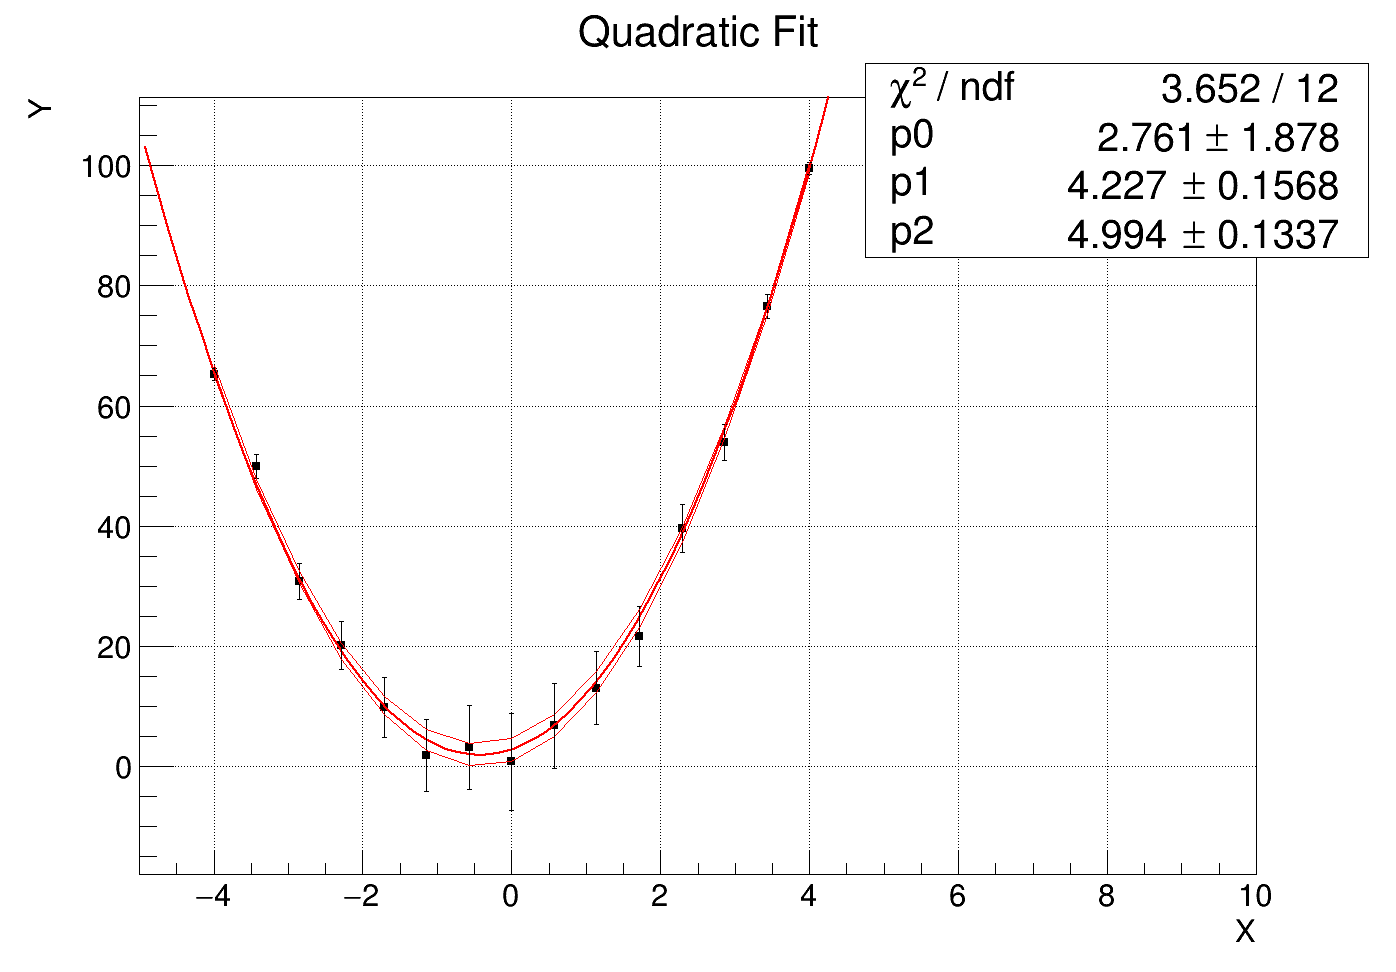

In [11]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Error Band Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(n,xfiterr,yfitplus2)
grm = TGraph(n,xfiterr,yfitminus2)

pfit1 = TF1("pfit1",rootfitstring)

gr.SetMarkerStyle(21)
gr.SetTitle(Title)
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.GetXaxis().SetLimits(xlow-1.0,xhigh+6.0) 
#gr.GetHistogram().SetMaximum(5.0)
#gr.GetHistogram().SetMinimum(0.0)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()

In [12]:
index=7
yfitvalue = 0.0
yerrorvalue = 0.0
for k in range(0,m_params):
    yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
    yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
yerrorvalue = math.sqrt(yerrorvalue)
print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))


P201 Error Calculation = 2.760742 +/- 1.878033 
Proper Error Calculation = 2.760742 +/- 1.878033 
